## 몇 개의 군집(cluster)로 묶을지 정해준다. → 현재는 K = 2

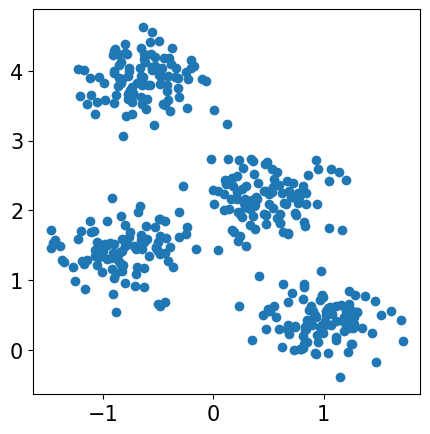

In [32]:

import numpy as np
from numpy.random import uniform, normal
import matplotlib.pyplot as plt
from dataset_utils import make_dataset

np.random.seed(0)

def make_dataset(n_classes=4, n_class_samples=100,
                 std=0.5, means=None, shuffle=True):
    if means == None:
        means = uniform(-5, 5, (n_classes, 2))

    X = []
    for class_idx in range(n_classes):
        mean = means[class_idx]

        X_class = normal(loc=mean, scale=std,
                         size=(n_class_samples, 2))

        X.append(X_class)

    X = np.vstack(X)
    return X



X = make_dataset(std=0.3)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])

ax.tick_params(labelsize=15)
plt.show()

## K개 만큼의 무게중심(centroid)을 임의로 설정한다


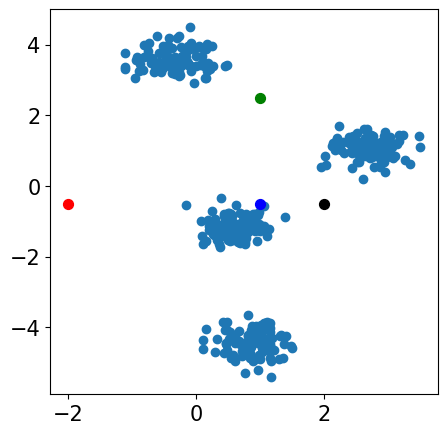

In [70]:
import random
import matplotlib.pyplot as plt
from dataset_utils import make_dataset

#임의의 데이터셋
X = make_dataset(std=0.3)

#임의의 무게중심 설정하기 #class4개였으니 무게 중심도 4개
centroid_one = np.array([-2, -0.5])
centroid_two = np.array([1, -0.5])
centroid_three = np.array([1, 2.5])
centroid_four = np.array([2, -0.5])

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.tick_params(labelsize=15)
ax.scatter(centroid_one[0],centroid_one[1],color='red',s=50)
ax.scatter(centroid_two[0],centroid_two[1],color='blue',s=50)
ax.scatter(centroid_three[0],centroid_three[1],color='green',s=50)
ax.scatter(centroid_four[0],centroid_four[1],color='black',s=50)


plt.show()

## 주어진 데이터마다 centroid와의 거리를 구해서, 가까운 쪽으로 줄을 선다

In [83]:
#K = 4
dists_one = []
for X_ in X:
    dist_one = np.sqrt(np.sum((centroid_one - X_)**2)) #centroid_one과 데이터들의거리
    dists_one.append(dist_one)
distss_two = []
for X_ in X:
    dist_two = np.sqrt(np.sum((centroid_two - X_)**2)) #데아터와 centroid_one의 거리
    dists_two.append(dist_two)
dists_three = []
for X_ in X:
    dist_three = np.sqrt(np.sum((centroid_three - X_)**2)) #데아터와 centroid_two의 거리
    dists_three.append(dist_three)
dists_four = []
for X_ in X:
    dist_four = np.sqrt(np.sum((centroid_four - X_)**2)) #centroid_one과 데이터들의거리
    dists_four.append(dist_four)

sorted_indices = np.argsort(dists_one) #인덱스 순서대로 정렬
print(sorted_indices) 
sorted_indices_ = np.argsort(dists_two) #인덱스 순서대로 정렬
print(sorted_indices_) 
sorted_indices_ = np.argsort(dists_three) #인덱스 순서대로 정렬
print(sorted_indices_) 
sorted_indices_ = np.argsort(dists_four) #인덱스 순서대로 정렬
print(sorted_indices_) 




#각각의 원소마다 dists_one,two,three,four 중에서 어디에 가까운지 구하려면,,,

#closest_centroid = y[closest_indices] 
#print(closest_classes)

[ 16  64  69  97  72   6   3  24  55   4  20  63  93   7  82  98  99  56
  35  78  45  67  29  73  14  33  40  81  94  85  80  51  23  66  41  37
  50  54  31  91  86  87  36  58  96  12  83  52   9  25  18  26  34  15
  42  11  10  89  28  76  38  47  32   2  57  19   5  95  92  70  60  48
  68  22  90  21  44  53  43  62  59  39  84   0  75  46  71  27  79  30
  65  77  88  13  61  49  17   1  74   8 222 294 298 227 200 232 234 238
 246 286 258 216 284 370 223 263 204 128 211 266 184 229 295 114 272 235
 337 279 210 290 231 160 315 289 219 265 287 262 239 243 292 255 202 267
 249 251 282 218 225 277 261 194 280 196 203 253 224 228 270 241 140 256
 273 221 248 274 141 233 293 212 260 268 350 322 252 214 245 201 199 254
 377 105 230 113 387 299 264 244 213 161 373 240 345 269 306 380 138 120
 134 102 104 146 137 348 122 236 178 157 278 142 192 217 394 215 164 152
 288 319 313 353 332 171 198 188 208 276 183 291 358 283 220 112 206 111
 159 329 115 341 123 144 338 257 375 335 205 389 33

- clustering된 데이터들의 무게중심을 구한다. → centroid update

- 3번(clustering process), 4번(centroid update)를 반복하면 다음과 같이 가까이 있는 데이터들끼리 묶인다

from sklearn.datasets import load_iris

# target 변수를 제외한 데이터 프레임
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

iris_df.head(3)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from dataset_utils import make_dataset

np.random.seed(0)

n_classes = 3 #분류하려는 클래스 3개
X, y = make_dataset(n_classes=n_classes)

test_data = np.array([-2, -0.5]) #빨간점 #좌표
print(test_data)

fig, ax = vis_dataset(X, y)
ax.scatter(test_data[0], test_data[1],
           color='red', s=100) #빨간점
plt.show()

ValueError: too many values to unpack (expected 2)

## Step.1 데이터셋과 초기 Centroid

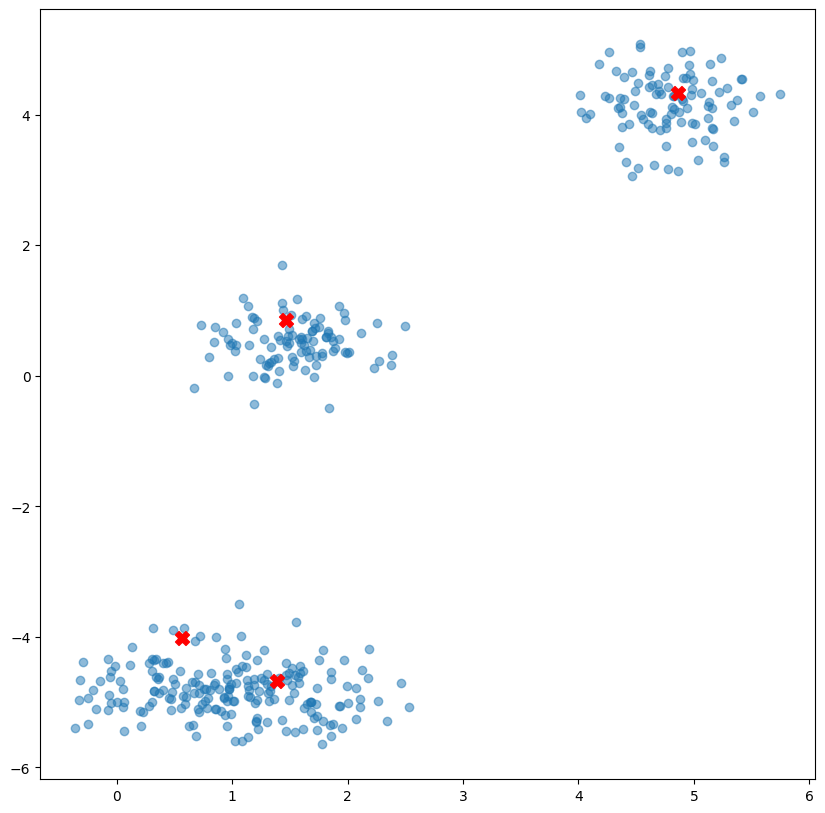

In [84]:
import numpy as np
import matplotlib.pyplot as plt

from dataset_utils import make_dataset

K = 4
X = make_dataset(std=0.4)
n_samples = X.shape[0]

random_indices = np.arange(400) # 0~399
np.random.shuffle(random_indices) # random하게 섞기
random_indices = random_indices[:K] # K개 인덱스 뽑기
centroids = X[random_indices] # 실제 존재하는 데이터에서 K개를 centroid로 가정

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1], alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1],
           color='red', marker='X', s=100)
plt.show()

## Step.2 데이터마다 Centroid와의 거리를 구하고, 가장 가까운 centroid 인덱스 구하기

In [86]:
X_ = X.reshape(n_samples, 1, 2) # (400, 1, 2)
centroids_ = centroids.reshape(1, K, 2) # (1, 4, 2)

dists = np.sum((X_ - centroids_) ** 2, axis=2) # (400 -> sample, 4 -> cluster)
clustering_indices = np.argmin(dists, axis=1) # 가까운 cluster의 인덱스
# "너 어떤 centroid랑 가장 가까워?"라고 400개마다 물어본 결과

## Step.3 같은 Cluster의 데이터 모으기

In [87]:
clustering_dict = {}
for k in range(K):
    cluster_X = X[clustering_indices == k]
    clustering_dict[k] = cluster_X

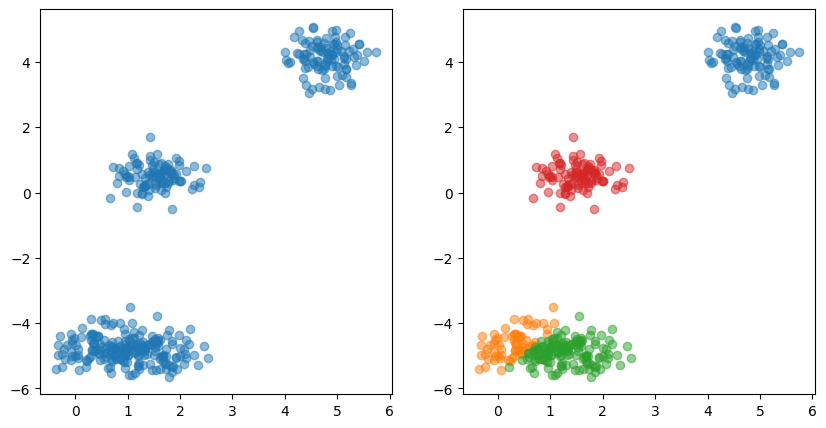

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(X[:, 0], X[:, 1], alpha=0.5)
for k in range(K):
    cluster_X = clustering_dict[k]
    axes[1].scatter(cluster_X[:, 0], cluster_X[:, 1], alpha=0.5)
plt.show()

## Step.4 Centroid Update

In [89]:
centroids = []
for k in range(K):
    centroid = np.mean(clustering_dict[k], axis=0)
    centroids.append(centroid)
centroids = np.concatenate(centroids).reshape(K, 2)

## Step.5 반복 적용하기

In [91]:
for step in range(5): # 총 5번 update
    centroids_ = centroids.reshape(1, K, 2)

    dists = np.sum((X_ - centroids_) ** 2, axis=2)
    clustering_indices = np.argmin(dists, axis=1)

    clustering_dict = {}
    for k in range(K):
        cluster_X = X[clustering_indices == k]
        clustering_dict[k] = cluster_X

    centroids = []
    for k in range(K):
        centroid = np.mean(clustering_dict[k], axis=0)
        centroids.append(centroid)
    centroids = np.concatenate(centroids).reshape(K, 2)


## Step.6 시각화 추가하기


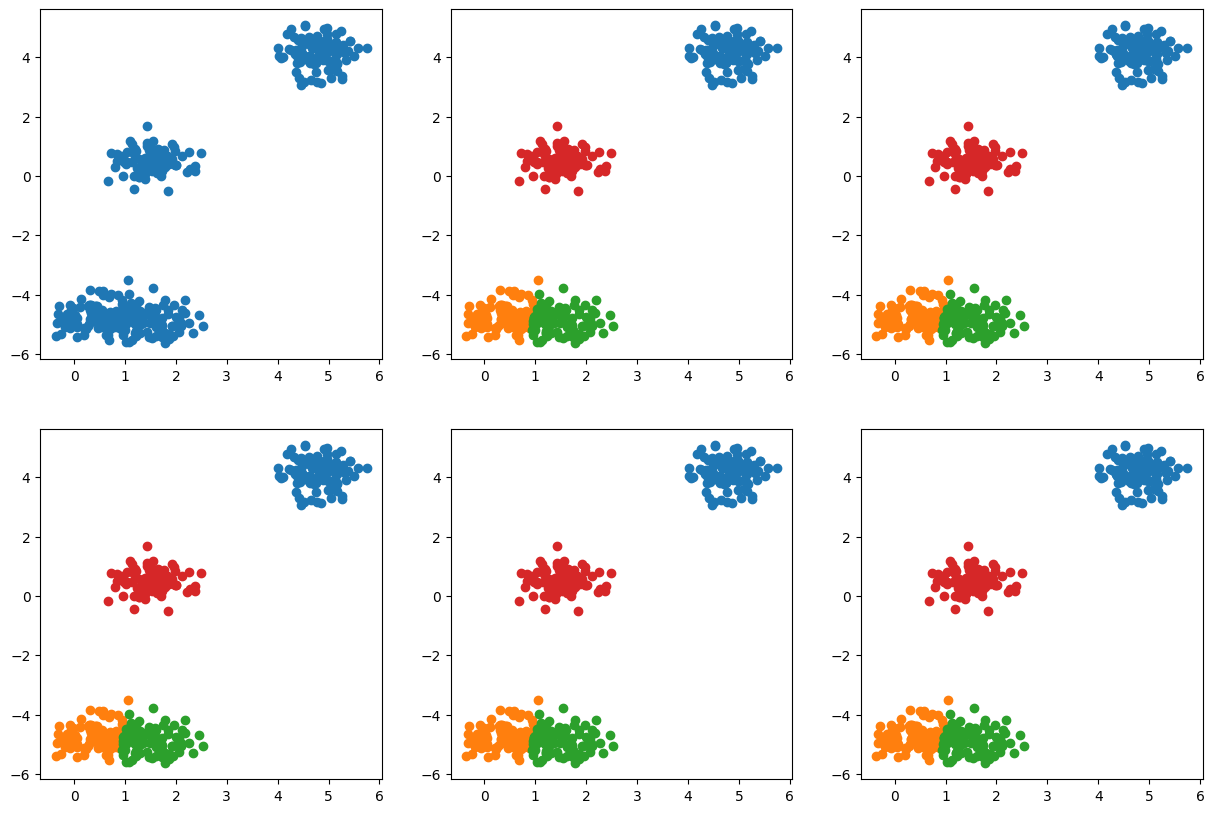

In [92]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) ###
axes = axes.flatten() ###
axes[0].scatter(X[:, 0], X[:, 1]) ###
for step in range(5):
    centroids_ = centroids.reshape(1, K, 2)

    dists = np.sum((X_ - centroids_) ** 2, axis=2)
    clustering_indices = np.argmin(dists, axis=1)

    clustering_dict = {}
    for k in range(K):
        cluster_X = X[clustering_indices == k]
        clustering_dict[k] = cluster_X

        axes[step + 1].scatter(cluster_X[:, 0], cluster_X[:, 1]) ###

    centroids = []
    for k in range(K):
        centroid = np.mean(clustering_dict[k], axis=0)
        centroids.append(centroid)
    centroids = np.concatenate(centroids).reshape(K, 2)

plt.show()

In [94]:
import numpy as np


def cal_inter_cluster_dist(centroids):
    K = centroids.shape[0]

    centroids_v = centroids.reshape(K, 1, 2)
    centroids_h = centroids.reshape(1, K, 2)

    cen_dists = np.sum((centroids_v - centroids_h)**2, axis=2)
    inter_cluster_dist = np.sum(cen_dists) / (K * (K - 1))
    return inter_cluster_dist


intra cluster distance : 센트로이드와 각 데이터들의 거리 (얼마나 오밀조밀하게 모여있는지) 
- intra cluster distance는 점점 작아져야 하고, 센트로이드 사이(Inter-cluster Distance)는 멀어져야(

Var[X] + Var[Y]로만 구해도 괜찮음

In [93]:
import numpy as np
import matplotlib.pyplot as plt

from dataset_utils import make_dataset
from utils import cal_inter_cluster_dist

K = 4
X = make_dataset(std=0.4)
n_samples = X.shape[0]

random_indices = np.arange(400)
np.random.shuffle(random_indices)
random_indices = random_indices[:K]
centroids = X[random_indices]

inter_cluster_dists = [cal_inter_cluster_dist(centroids)]
X_ = X.reshape(n_samples, 1, 2)

fig, axes = plt.subplots(2, 3, figsize=(15, 10)) ###
axes = axes.flatten() ###
axes[0].scatter(X[:, 0], X[:, 1]) ###
for step in range(5):
    centroids_ = centroids.reshape(1, K, 2)

    dists = np.sum((X_ - centroids_) ** 2, axis=2)
    clustering_indices = np.argmin(dists, axis=1)

    clustering_dict = {}
    for k in range(K):
        cluster_X = X[clustering_indices == k]
        clustering_dict[k] = cluster_X

        axes[step + 1].scatter(cluster_X[:, 0], cluster_X[:, 1]) ###

    centroids = []
    for k in range(K):
        centroid = np.mean(clustering_dict[k], axis=0)
        centroids.append(centroid)
    centroids = np.concatenate(centroids).reshape(K, 2)

    inter_cluster_dists.append(cal_inter_cluster_dist(centroids))

plt.show()
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(inter_cluster_dists)
plt.show()

ModuleNotFoundError: No module named 'utils'